### Codio Activity 14.6:  Pruning a Tree after Fitting

**Expected Time = 60 minutes**

**Total Points = 50**

This activity focuses on using pruning to avoid overfitting in the decision tree.  By default, scikit-learn offers a `cost_complexity_pruning_path` that helps decide what the optimal `ccp_alpha` hyperparameter.  In what follows, you will learn how you can use the cost complexity paths to optimize the `ccp_alpha` hyperparameter in your `DecisionTreeClassifier`.  

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)
- [Problem 4](#-Problem-4)
- [Problem 5](#-Problem-5)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import Pipeline
import seaborn as sns

### The Data

For this exercise, you will use the iris data from the videos.  Again, the goal is to predict the species of flower using measurements of the plant.  Below, the data is loaded, cleaned, and split for you.

In [5]:
iris = sns.load_dataset('iris')

In [6]:
X = iris.drop(['species'], axis = 1)
y = iris['species']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 22)

[Back to top](#-Index)

### Problem 1

#### Extracting the path

**10 Points**

Below, fit a `DecisionTreeClassifier` on the training data `X_train` and `y_train` with all default parameters and `random_state = 42`.  

Use the `.cost_complexity_pruning_path()` method on the estimator with arguments equal to the taining data. Assign the results to the variable `path` below.

In [12]:
### GRADED

# YOUR CODE HERE
dtree = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
path = dtree.cost_complexity_pruning_path(X_train, y_train)

# Answer check
path

{'ccp_alphas': array([0.        , 0.00868056, 0.01190476, 0.01733193, 0.02018468,
        0.25904922, 0.34046294]),
 'impurities': array([0.        , 0.01736111, 0.02926587, 0.04659781, 0.06678248,
        0.3258317 , 0.66629464])}

[Back to top](#-Index)

### Problem 2

#### The `ccp_alphas` and `impurities`

**10 Points**

Your `path` variable now contains a collection of `ccp_alpha` values that control the pruning and the associated impurities for each prune.  

Assign the result of the `ccp_alpha` method on `path` to  the variable `ccp_alphas`. Use the `impurities` method on `path` and assign the result to the variable `impurities` below.  

Note, the plot of the alphas again impurities demonstrates that the full tree has total impurity 0 and increases until the tree with only a single node.  Uncomment the code to visualize the results.

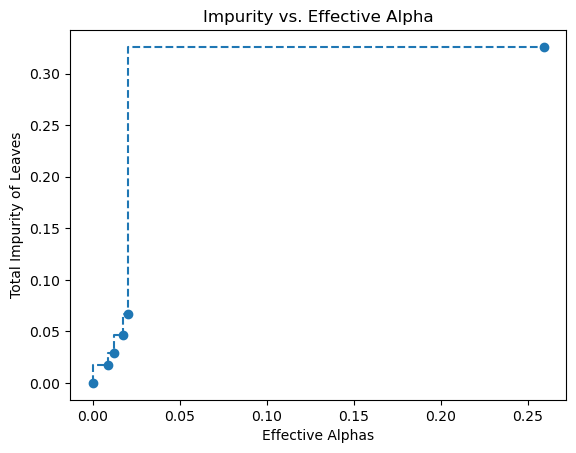

In [16]:
### GRADED

# YOUR CODE HERE
ccp_alphas = path.ccp_alphas
impurities = path.impurities

## Answer check
plt.step(ccp_alphas[:-1], impurities[:-1], '--o')
plt.title('Impurity vs. Effective Alpha')
plt.xlabel('Effective Alphas')
plt.ylabel('Total Impurity of Leaves');

[Back to top](#-Index)

### Problem 3

#### How the Nodes change with alpha

**10 Points**


Now, loop over the `ccp_alphas` and build a `DecisionTreeClassifier` with `random_state = 42` and `ccp_alpha = i` where `i` is the given alpha. Fit each estimator to the training data. Inside the loop, keep track of the fit tree node count using the `.tree_.node_count` attribute and store it the list `nodes`. 



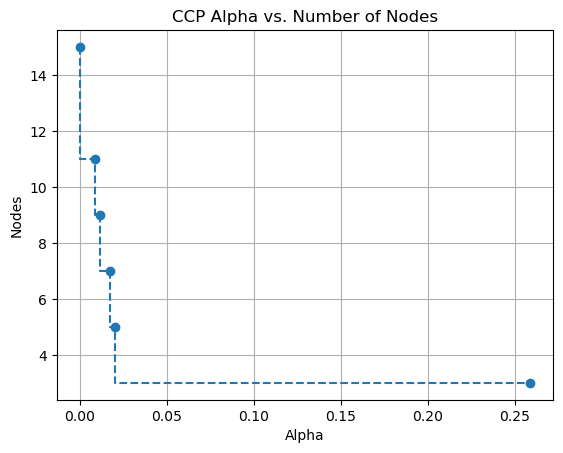

In [20]:
### GRADED

nodes = []
for i in ccp_alphas[:-1]:
    tree = DecisionTreeClassifier(random_state=42, ccp_alpha=i).fit(X_train, y_train)
    
    nodes.append(tree.tree_.node_count)

## Answer check
plt.step(ccp_alphas[:-1], nodes, '--o')
plt.xlabel('Alpha')
plt.ylabel('Nodes')
plt.title('CCP Alpha vs. Number of Nodes')
plt.grid();

[Back to top](#-Index)

### Problem 4

#### Depth of tree as alpha increases

**10 Points**

Repeat the above exercise this time extracting and tracking the depth of the tree using the `.get_depth()` method.  Uncomment the code to visualize the relationship.  

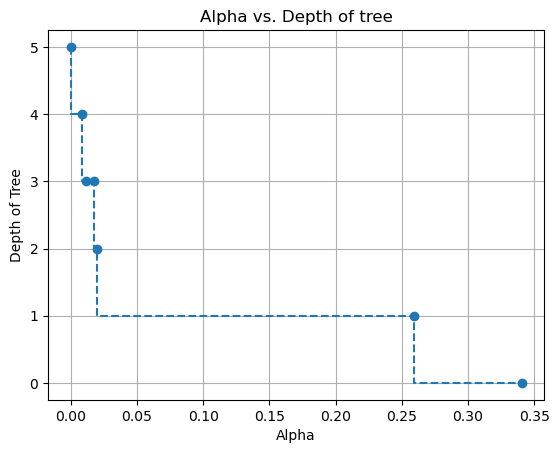

In [26]:
### GRADED

# YOUR CODE HERE
depths = []
for i in ccp_alphas:
    tree = DecisionTreeClassifier(random_state=42, ccp_alpha=i).fit(X_train, y_train)
    
    depths.append(tree.get_depth())

# Answer check
plt.step(ccp_alphas, depths, '--o')
plt.ylabel('Depth of Tree')
plt.xlabel('Alpha')
plt.grid()
plt.title('Alpha vs. Depth of tree');

[Back to top](#-Index)

### Problem 5

#### Scoring the trees

**10 Points**

Finally, loop over the `ccp_alphas` building a tree for each and recording its training and testing accuracy to `train_accs` and `test_accs` below.  What `ccp_alpha` value resulted in the highest accuracy on the test data?  Uncomment the code to view the plot of the results.

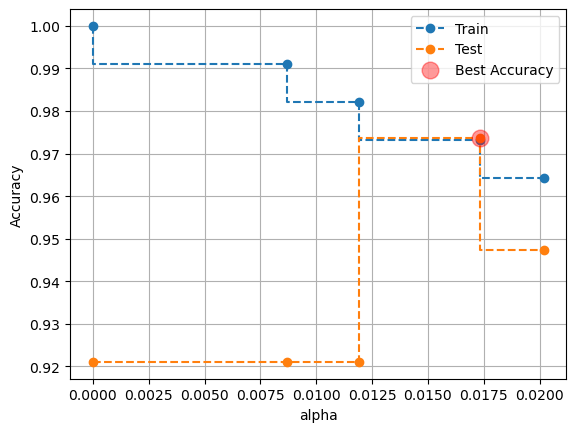

In [28]:
### GRADED

# YOUR CODE HERE
train_accs = []
test_accs = []
for i in ccp_alphas[:-1]:
    dtree = DecisionTreeClassifier(random_state=42, ccp_alpha=i).fit(X_train, y_train)
    train_accs.append(dtree.score(X_train, y_train))
    test_accs.append(dtree.score(X_test, y_test))

# # Answer check
plt.step(ccp_alphas[:-2], train_accs[:-1], '--o', label = 'Train')
plt.step(ccp_alphas[:-2], test_accs[:-1], '--o', label = 'Test')
plt.plot(ccp_alphas[np.argmax(test_accs)], max(test_accs), 'ro', markersize = 12, alpha = 0.4, label = 'Best Accuracy')
plt.legend()
plt.grid()
plt.xlabel('alpha')
plt.ylabel('Accuracy');

For more examples of using Cost Complexity Pruning in scikitlearn see the example documentation [here](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html), and for more details on how the algorithm determines where to prune and how to compute alpha see [here](http://mlwiki.org/index.php/Cost-Complexity_Pruning).  

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (30, 10))
plot_tree(DecisionTreeClassifier(random_state=42).fit(X_train, y_train), ax = ax[0], filled = True, feature_names=X.columns);
ax[0].set_title('Unpruned Tree', fontsize = 20)
plot_tree(DecisionTreeClassifier(random_state = 42, ccp_alpha=ccp_alphas[np.argmax(test_accs)]).fit(X_train, y_train), filled = True, feature_names = X.columns);
ax[1].set_title('Pruned Tree', fontsize = 20);